* 파이캐럿 튜토리얼 https://pycaret.gitbook.io/docs/get-started/tutorials

In [ ]:
# 파이캐럿 설치
!  pip install pycaret

In [ ]:
# 파이캐럿 임포트
from pycaret.regression import * 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 파이캐럿데이터 임포트
from pycaret.datasets import get_data

In [ ]:
# 파이캐럿의 다이아몬드 데이터 읽어서 df에 저장
df = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
####### 독립변수 ##########
# 무게 (Carat Weight)
# 절단 (Cut)
# 색 (Color)
# 깨끗함 (Clarity)
# 광택 (Polish)
# 대칭 (Symmetry)
# 평가 (Report)

##### 종속변수 #######
# 가격 (Price)

df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
# df.sample(frac=0.8, random_state=786): df에서 80%의 데이터를 리턴 
#                                      : random_state를 설정해서 매번 같은 데이터가 리턴 되도록 함

data_seen = df.sample(frac=0.8, random_state=786)
data_seen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
2441,1.16,Ideal,F,SI1,EX,EX,GIA,6768
2834,0.81,Very Good,G,SI1,VG,VG,AGSL,2806
5823,1.02,Ideal,E,SI1,VG,VG,GIA,5509
719,1.01,Very Good,G,VVS2,EX,EX,GIA,7439


In [ ]:
# df.drop(data_seen.index) : data_seen을 제외한 나머지 20% 데이터를 리턴
data_unseen = df.drop(data_seen.index)

data_unseen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
11,1.01,Good,E,SI1,G,G,GIA,5161
...,...,...,...,...,...,...,...,...
5984,0.90,Good,H,SI1,VG,VG,GIA,3577
5993,2.03,Very Good,H,VS2,VG,G,GIA,18866
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
# df에서 80% 의 데이터 조회 (인덱스가 섞여 있으며 중간에 빈 인덱스가 있음)
data_seen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
2441,1.16,Ideal,F,SI1,EX,EX,GIA,6768
2834,0.81,Very Good,G,SI1,VG,VG,AGSL,2806
5823,1.02,Ideal,E,SI1,VG,VG,GIA,5509
719,1.01,Very Good,G,VVS2,EX,EX,GIA,7439


In [ ]:
# data_seen.reset_index(drop=True, inplace=True) : 기존 인덱스를 삭제하고 (drop=True)
#                                                : 새로운 인덱스 설정 (inplace=True) 
data_seen.reset_index(drop=True, inplace=True)

In [ ]:
# 뒤죽 박죽이었던 인덱스가 다시 설정됨
data_seen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
4795,1.16,Ideal,F,SI1,EX,EX,GIA,6768
4796,0.81,Very Good,G,SI1,VG,VG,AGSL,2806
4797,1.02,Ideal,E,SI1,VG,VG,GIA,5509
4798,1.01,Very Good,G,VVS2,EX,EX,GIA,7439


In [ ]:
# df에서 20% 의 데이터 조회 (인덱스가 섞여 있으며 중간에 빈 인덱스가 있음)
data_unseen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
11,1.01,Good,E,SI1,G,G,GIA,5161
...,...,...,...,...,...,...,...,...
5984,0.90,Good,H,SI1,VG,VG,GIA,3577
5993,2.03,Very Good,H,VS2,VG,G,GIA,18866
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
# data_unseen.reset_index(drop=True, inplace=True) : 기존 인덱스를 삭제하고 (drop=True)
#                                                : 새로운 인덱스 설정 (inplace=True) 
data_unseen.reset_index(drop=True, inplace=True)

In [ ]:
data_unseen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
2,1.50,Fair,F,SI1,VG,VG,GIA,10450
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609
4,1.01,Good,E,SI1,G,G,GIA,5161
...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


# Pycaret으로 모델 생성

# Pycaret으로 모델 생성 기본 옵션

setup 함수

* pycaret을 초기화
* data, target은 필수 옵션 나머지 파라메터는 선택 옵션
* data :독립변수와 종속변수가 저장된 DataFrame
* target :종속변수 컬럼의 이름

In [ ]:
setup(data = data_seen, # 파이캐럿으로 가장 성능이 높은 알고리즘을 알아낼 데이터 (전체 데이터 df의 80%)

      target='Price',   # 종속변수 컬럼
      
      session_id = 123  # 가장 성능이 높은 컬럼을 알아낼때 일부 행으로 트리등을 만들고 일부데이터로 성능 측정
                        # session_id를 설정하면 매번 같은 행으로 트리 등을만들고 같은 행으로 성능 측정  
      )

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(4800, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3359, 28)"


(5, [], 0       12702
 1        8481
 2       18623
 3       27252
 4        9641
         ...  
 4795     6768
 4796     2806
 4797     5509
 4798     7439
 4799    16774
 Name: Price, Length: 4800, dtype: int64, [('Setup Config',
                                  Description             Value
   0                               session_id               123
   1                                   Target             Price
   2                            Original Data         (4800, 8)
   3                           Missing Values             False
   4                         Numeric Features                 1
   5                     Categorical Features                 6
   6                         Ordinal Features             False
   7                High Cardinality Features             False
   8                  High Cardinality Method              None
   9                    Transformed Train Set        (3359, 28)
   10                    Transformed Test Set        (1441, 28)


In [ ]:
# setup 함수에서 설정한 data_seen 데이터의 일부 데이터로 트리등을 생성하고
# 일부 데이터로 MSE (Mean Squared Error) 를 계산해서  
# MSE (Mean Squared Error) 가 낮은 순으로 3개의 모델을 리턴

top_3_model = compare_models(sort='MSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,743.5204,2.651852e+06,1589.7233,0.9752,0.0806,0.0596,1.201
rf,Random Forest Regressor,761.8786,3.288741e+06,1766.0709,0.9692,0.0813,0.0589,1.297
gbr,Gradient Boosting Regressor,939.5084,3.731492e+06,1909.3108,0.9646,0.1040,0.0786,0.250
lightgbm,Light Gradient Boosting Machine,800.0871,3.771084e+06,1906.0593,0.9645,0.0796,0.0582,0.107
dt,Decision Tree Regressor,1032.7978,6.986285e+06,2558.2793,0.9340,0.1084,0.0778,0.029
lasso,Lasso Regression,2462.3150,1.470387e+07,3803.5524,0.8617,0.6519,0.2916,0.035
lr,Linear Regression,2468.8681,1.470946e+07,3804.0765,0.8616,0.6194,0.2934,0.337
llar,Lasso Least Angle Regression,2408.1873,1.472597e+07,3804.5323,0.8617,0.6310,0.2784,0.019
br,Bayesian Ridge,2467.0548,1.472606e+07,3806.9478,0.8615,0.6472,0.2925,0.020
ridge,Ridge Regression,2471.8619,1.473678e+07,3808.6177,0.8616,0.6455,0.2931,0.015


In [ ]:
# MSE (Mean Squared Error)가 가장 낮은 3개의 모델 조회

# ExtraTreesRegressor, RandomForestRegressor,  GradientBoostingRegressor 가
# MSE 가 가장 낮은 3개의 모델임
top_3_model

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False),
 Gradient

In [ ]:
#  Pycaret에 내장된 모델을 조회
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Extra Trees Regressor	(MSE 가장 적은 Top3 중 하나)

In [ ]:
# create_model('et') : Extra Trees Regressor 모델을 생성해서 리턴
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,680.2735,1.404683e+06,1185.1932,0.9861,0.0772,0.0585
1,769.6716,3.729562e+06,1931.2074,0.9730,0.0797,0.0593
2,752.2908,2.175295e+06,1474.8881,0.9792,0.0823,0.0597
3,772.9064,2.621189e+06,1619.0087,0.9765,0.0838,0.0620
4,812.8811,3.964473e+06,1991.0985,0.9663,0.0861,0.0621
5,661.9173,1.659623e+06,1288.2637,0.9826,0.0754,0.0569
6,728.5663,5.086003e+06,2255.2169,0.9512,0.0760,0.0558
7,709.6303,1.474596e+06,1214.3296,0.9805,0.0780,0.0585
8,736.1317,1.588460e+06,1260.3412,0.9853,0.0736,0.0568
9,810.9349,2.814631e+06,1677.6862,0.9711,0.0941,0.0667


In [ ]:
et

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [ ]:
# 생성한 ExtraTreesRegressor 모델 객체의 파라메터가 가장 성능이 높은 값을 찾아서 설정
# 모든 경우에 대해서 대입해서 가장 성능이 높은 값을 찾음 (오래 걸림)
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,902.1140,3.198274e+06,1788.3720,0.9683,0.0967,0.0757
1,980.1572,6.635820e+06,2576.0085,0.9520,0.0963,0.0754
2,853.9943,2.560579e+06,1600.1808,0.9755,0.0889,0.0692
3,1021.0255,5.529852e+06,2351.5638,0.9504,0.1036,0.0765
4,1031.7451,6.699364e+06,2588.3130,0.9431,0.0995,0.0763
5,863.6340,2.554186e+06,1598.1820,0.9731,0.0989,0.0734
6,874.1138,7.100911e+06,2664.7535,0.9318,0.0901,0.0646
7,936.8098,3.072185e+06,1752.7649,0.9594,0.0978,0.0765
8,933.3118,2.875663e+06,1695.7779,0.9734,0.0962,0.0731
9,971.8939,4.049758e+06,2012.4011,0.9584,0.1120,0.0812


In [ ]:
# 파라메터가 튜닝된 ExtraTreesRegressor 객체
tuned_et

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [ ]:
# ExtraTreesRegressor 객체 기본 파라메터 값 조회
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [ ]:
# ExtraTreesRegressor 객체 튜닝된 파라메터 값 조회
plot_model(tuned_et, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None
min_samples_leaf,4


# Random Forest Regressor	(MSE 가장 적은 Top3 중 하나)

In [ ]:
# create_model('rf') : RandomForestRegressor 객체를 생성
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,686.3991,1.812020e+06,1346.1128,0.9820,0.0767,0.0573
1,756.8355,4.005935e+06,2001.4833,0.9710,0.0782,0.0585
2,649.8242,1.446433e+06,1202.6775,0.9862,0.0702,0.0536
3,888.3572,5.043976e+06,2245.8797,0.9548,0.0871,0.0631
4,832.2832,4.538158e+06,2130.2953,0.9615,0.0867,0.0611
5,674.5035,1.712833e+06,1308.7523,0.9820,0.0742,0.0556
6,721.8074,5.682114e+06,2383.7184,0.9454,0.0737,0.0523
7,775.6549,1.873823e+06,1368.8765,0.9753,0.0817,0.0616
8,807.5382,2.959515e+06,1720.3242,0.9726,0.0846,0.0601
9,825.5831,3.812604e+06,1952.5891,0.9609,0.0997,0.0660


In [ ]:
# RandomForestRegressor 객체 출력
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
# 생성한 RandomForestRegressor 모델 객체의 파라메터가 가장 성능이 높은 값을 찾아서 설정
# 모든 경우에 대해서 대입해서 가장 성능이 높은 값을 찾음 (오래 걸림)
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,885.7282,3.065989e+06,1750.9966,0.9696,0.0975,0.0752
1,977.7136,5.861468e+06,2421.0468,0.9576,0.0993,0.0766
2,835.7230,2.198122e+06,1482.6063,0.9790,0.0883,0.0676
3,1062.6024,6.544891e+06,2558.2985,0.9414,0.1071,0.0768
4,1068.0303,6.734382e+06,2595.0687,0.9428,0.1015,0.0767
5,880.3105,2.871183e+06,1694.4565,0.9698,0.0973,0.0718
6,893.8489,6.987967e+06,2643.4764,0.9329,0.0913,0.0652
7,1061.1536,3.996278e+06,1999.0693,0.9472,0.1105,0.0834
8,1043.6155,4.813443e+06,2193.9560,0.9555,0.1103,0.0791
9,980.7347,4.632594e+06,2152.3462,0.9524,0.1170,0.0811


In [ ]:
# 파라메터가 튜닝된 RandomForestRegressor 객체
tuned_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
# RandomForestRegressor 객체의 기본 파라메터
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [ ]:
# RandomForestRegressor 객체 튜닝된 파라메터 값 조회

plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_impurity_split,None
min_samples_leaf,4


# GradientBoostingRegressor (MSE 가장 적은 Top3 중 하나)

In [ ]:
# create_model('gbr') : GradientBoostingRegressor 객체 생성
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,855.7734,2.492571e+06,1578.7878,0.9753,0.1042,0.0787
1,969.0165,4.034227e+06,2008.5386,0.9708,0.1021,0.0799
2,855.7649,2.206295e+06,1485.3604,0.9789,0.0978,0.0732
3,966.9088,4.264663e+06,2065.1060,0.9618,0.1053,0.0797
4,1017.3225,5.800254e+06,2408.3716,0.9507,0.1067,0.0804
5,905.0913,3.842701e+06,1960.2808,0.9596,0.1030,0.0758
6,941.6804,5.176031e+06,2275.0892,0.9503,0.0975,0.0743
7,903.7029,2.608884e+06,1615.2041,0.9655,0.1004,0.0772
8,1051.9603,4.072606e+06,2018.0700,0.9623,0.1085,0.0817
9,927.8628,2.816690e+06,1678.2998,0.9711,0.1145,0.0854


In [ ]:
# GradientBoostingRegressor 객체 조회
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# 생성한 GradientBoostingRegressor 모델 객체의 파라메터가 가장 성능이 높은 값을 찾아서 설정
# 모든 경우에 대해서 대입해서 가장 성능이 높은 값을 찾음 (오래 걸림)
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,618.4472,1.552400e+06,1245.9536,0.9846,0.0652,0.0485
1,752.2971,2.814654e+06,1677.6930,0.9797,0.0735,0.0551
2,632.9924,1.559973e+06,1248.9888,0.9851,0.0657,0.0498
3,783.3696,2.928778e+06,1711.3674,0.9738,0.0755,0.0557
4,830.8996,4.122243e+06,2030.3309,0.9650,0.0806,0.0584
5,676.9874,1.812613e+06,1346.3331,0.9809,0.0759,0.0558
6,684.0641,4.595802e+06,2143.7822,0.9559,0.0638,0.0456
7,746.2897,2.087408e+06,1444.7866,0.9724,0.0766,0.0564
8,804.3734,2.428299e+06,1558.3000,0.9775,0.0748,0.0569
9,722.2786,2.761955e+06,1661.9131,0.9716,0.0857,0.0574


In [ ]:
# 파라메터가 튜닝된 GradientBoostingRegressor 객체
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.02, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=230,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# GradientBoostingRegressor 객체의 기본 파라메터 조회
plot_model(gbr, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


In [ ]:
# GradientBoostingRegressor 객체의 튜닝된 파라메터 조회
plot_model(tuned_gbr, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.15
loss,ls
max_depth,7
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.02


# tuned_et (파라메터가 튜닝된 ExtraTreesRegressor 객체) 로 data_unseen 예측

In [ ]:
# predict_model(tuned_et, data=data_unseen) : tuned_et (파라메터가 튜닝된 ExtraTreesRegressor 객체)
# 예측한 값이 unseen_et_predict에 저장됨 
unseen_et_predict = predict_model(tuned_et, data=data_unseen)

In [ ]:
# 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격
unseen_et_predict

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3342.755752
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11439.191268
2,1.50,Fair,F,SI1,VG,VG,GIA,10450,11199.102821
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609,18539.390211
4,1.01,Good,E,SI1,G,G,GIA,5161,5101.458205
...,...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577,3780.787793
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866,20198.730051
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6002.975432
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,10353.113866


In [ ]:
# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

# 실제값과 예측값 만 조회
unseen_et_predict[["Price", "Label"]]

,Price,Label
0,3171,3342.755752
1,12791,11439.191268
2,10450,11199.102821
3,18609,18539.390211
4,5161,5101.458205
...,...,...
1195,3577,3780.787793
1196,18866,20198.730051
1197,6250,6002.975432
1198,11206,10353.113866


# tuned_rf (파라메터가 튜닝된 Random Forest Regressor 객체) 로 data_unseen 예측

In [ ]:
# predict_model(tuned_rf, data=data_unseen) : tuned_rf (파라메터가 튜닝된 Random Forest Regressor 객체)
# 예측한 값이 unseen_rf_predict에 저장됨 
unseen_rf_predict = predict_model(tuned_rf, data=data_unseen)

In [ ]:
# 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

unseen_rf_predict

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3408.930553
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,11605.393801
2,1.50,Fair,F,SI1,VG,VG,GIA,10450,11038.899320
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609,18219.120285
4,1.01,Good,E,SI1,G,G,GIA,5161,5119.888830
...,...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577,3735.842538
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866,19969.185058
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6110.665188
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,10812.487339


In [ ]:
# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

# 실제값과 예측값 만 조회
unseen_rf_predict[["Price", "Label"]]

,Price,Label
0,3171,3408.930553
1,12791,11605.393801
2,10450,11038.899320
3,18609,18219.120285
4,5161,5119.888830
...,...,...
1195,3577,3735.842538
1196,18866,19969.185058
1197,6250,6110.665188
1198,11206,10812.487339


# tuned_gbr (파라메터가 튜닝된 GradientBoostingRegressor 객체) 로 data_unseen 예측

In [ ]:
# predict_model(tuned_gbr, data=data_unseen) : tuned_gbr (파라메터가 튜닝된 GradientBoostingRegressor 객체)
# 예측한 값이 unseen_gbr_predict에 저장됨 

unseen_gbr_predict = predict_model(tuned_gbr, data=data_unseen)

In [ ]:
# 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격
unseen_gbr_predict

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3224.894491
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13206.563020
2,1.50,Fair,F,SI1,VG,VG,GIA,10450,10381.084041
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609,18638.770920
4,1.01,Good,E,SI1,G,G,GIA,5161,5102.035174
...,...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577,3588.626573
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866,19342.622176
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6282.511741
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,11595.858732


In [ ]:
# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

# 실제값과 예측값 만 조회
unseen_gbr_predict[["Price", "Label"]]

,Price,Label
0,3171,3224.894491
1,12791,13206.563020
2,10450,10381.084041
3,18609,18638.770920
4,5161,5102.035174
...,...,...
1195,3577,3588.626573
1196,18866,19342.622176
1197,6250,6282.511741
1198,11206,11595.858732


# 앙상블 모델 (1)

1. Extra Tree Regressor 예측값 (unseen_et_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)
2. Random Forest Regressor 예측값 (unseen_rf_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)
3. GradientBoostingRegressor 예측값 (unseen_gbr_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)

* 1,2,3의 평균으로 예측값 설정

In [ ]:
"""
1. Extra Tree Regressor 예측값 (unseen_et_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)
2. Random Forest Regressor 예측값 (unseen_rf_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)
3. GradientBoostingRegressor 예측값 (unseen_gbr_predict 데이터 프레임의 ["Label"] 컬럼에 저장되 있음)

* 1,2,3의 평균으로 예측값 설정해서 ensemble_predict에 저장

"""
ensemble_predict = (unseen_et_predict["Label"] + unseen_rf_predict["Label"] + unseen_gbr_predict["Label"]) / 3

In [ ]:
# 앙상블 모델의 예측값
ensemble_predict

0        3325.526932
1       12083.716030
2       10873.028727
3       18465.760472
4        5107.794070
            ...     
1195     3701.752301
1196    19836.845761
1197     6132.050787
1198    10920.486646
1199    36897.361343
Name: Label, Length: 1200, dtype: float64

In [ ]:
# 실제 다이아몬드 가격
data_unseen["Price"]

0        3171
1       12791
2       10450
3       18609
4        5161
        ...  
1195     3577
1196    18866
1197     6250
1198    11206
1199    30507
Name: Price, Length: 1200, dtype: int64

In [ ]:
# data_unseen["Price"] : 다이아몬드 실제 가격
# ensemble_predict : 앙상블 모델을 이용한 다이아몬드의 예측값

# mean_squared_error : 실제가격과 예측값 사이에 MSE (Mean Squared Error)를 계산

mean_squared_error(data_unseen["Price"] , ensemble_predict)

1935975.4582895047

# 앙상블 모델 (2)

* 앙상블 모델 (1) 과 같으나 Pycaret에서 제공하는 함수 사용

1. Extra Tree Regressor (tuned_et) 를 이용해서 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 예측

* 1,2,3의 평균으로 예측값 설정

In [ ]:
"""
1. Extra Tree Regressor (tuned_et) 를 이용해서 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 예측

* 1,2,3의 평균으로 예측값 설정할 객체 blender 생성
"""
blender = blend_models(estimator_list = [tuned_et, tuned_rf, tuned_gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,711.5065,1.897815e+06,1377.6122,0.9812,0.0790,0.0607
1,804.6022,4.238000e+06,2058.6403,0.9694,0.0803,0.0623
2,685.0384,1.504395e+06,1226.5380,0.9856,0.0728,0.0564
3,871.3651,3.962778e+06,1990.6728,0.9645,0.0866,0.0634
4,924.9361,5.457126e+06,2336.0493,0.9536,0.0866,0.0661
5,731.9063,1.923935e+06,1387.0597,0.9798,0.0836,0.0620
6,737.3470,5.872137e+06,2423.2493,0.9436,0.0740,0.0523
7,825.1118,2.506552e+06,1583.2095,0.9669,0.0867,0.0663
8,861.5234,2.806175e+06,1675.1643,0.9740,0.0849,0.0647
9,829.6842,3.419013e+06,1849.0573,0.9649,0.0978,0.0685


In [ ]:
# blender에 저장된 객체 조회
blender.estimators_

[ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                     max_features=1.0, max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=9, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.1,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False),
 GradientBoostingRegre

In [ ]:
"""
 predict_model(blender , data = data_unseen) : blender 객체를 이용해서 data_unseen을 예측

blender객체는 
1. Extra Tree Regressor (tuned_et) 를 이용해서 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 예측

* 1,2,3의 평균으로 예측값을 unseen_blender_predict 에 대입
"""
unseen_blender_predict = predict_model(blender , data = data_unseen)

In [ ]:
# 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

unseen_blender_predict

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3325.526932
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12083.716030
2,1.50,Fair,F,SI1,VG,VG,GIA,10450,10873.028727
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609,18465.760472
4,1.01,Good,E,SI1,G,G,GIA,5161,5107.794070
...,...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577,3701.752301
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866,19836.845761
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6132.050787
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,10920.486646


In [ ]:
# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

# 실제값과 예측값 만 조회
# 예측값 Label 컬럼의 값이 앙상블모델 (1) 의 예측값과 같음
unseen_blender_predict[["Price","Label" ]]

,Price,Label
0,3171,3325.526932
1,12791,12083.716030
2,10450,10873.028727
3,18609,18465.760472
4,5161,5107.794070
...,...,...
1195,3577,3701.752301
1196,18866,19836.845761
1197,6250,6132.050787
1198,11206,10920.486646


In [ ]:
# unseen_blender_predict["Price"] : 다이아몬드 실제 가격
# unseen_blender_predict["Label"] : 앙상블 모델을 이용한 다이아몬드의 예측값

# mean_squared_error : 실제가격과 예측값 사이에 MSE (Mean Squared Error)를 계산
# 앙상블모델(1)의 Mean Squared Error와 같음
mean_squared_error(unseen_blender_predict["Price"],unseen_blender_predict["Label"])

1935975.4582895047

# 앙상블 모델 (3)

* 스태킹 모델

1. Extra Tree Regressor (tuned_et) 를 이용해서 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 예측

4. 새로운 데이터 프레임을 생성해서 1,2,3 의 예측값을 데이터프레임의 각 컬럼에 저장

5. 예측값들이 저장된 4의 데이터 프레임을 입력으로 트리등 생성 및 성능 측정

In [ ]:
# 파이캐럿에서 트리, weight 등을 만드는 데이터
data_seen

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641
...,...,...,...,...,...,...,...,...
4795,1.16,Ideal,F,SI1,EX,EX,GIA,6768
4796,0.81,Very Good,G,SI1,VG,VG,AGSL,2806
4797,1.02,Ideal,E,SI1,VG,VG,GIA,5509
4798,1.01,Very Good,G,VVS2,EX,EX,GIA,7439


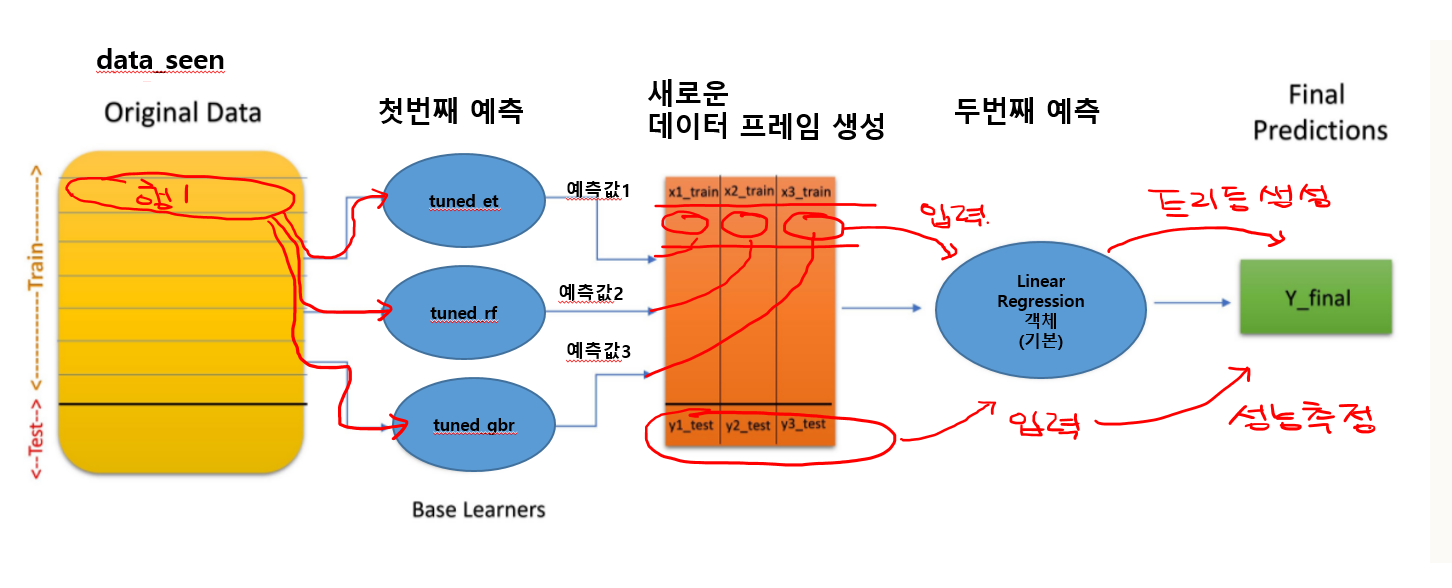

In [ ]:
# stack_models(estimator_list = [tuned_et, tuned_rf, tuned_gbr]) :
"""
1. Extra Tree Regressor (tuned_et) 를 이용해서 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 예측

4. 새로운 데이터 프레임을 생성해서 1,2,3 의 예측값을 데이터프레임의 각 컬럼에 저장

5. 예측값들이 저장된 4의 데이터 프레임을 입력으로 트리등 생성 및 성능 측정
 (기본 LinearRegression 객체로 예측)

"""
stacker = stack_models(estimator_list = [tuned_et, tuned_rf, tuned_gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,614.8750,1.295088e+06,1138.0195,0.9872,0.0732,0.0557
1,732.4214,3.222863e+06,1795.2335,0.9767,0.0773,0.0576
2,634.4181,1.408660e+06,1186.8698,0.9865,0.0704,0.0524
3,753.5598,2.467879e+06,1570.9485,0.9779,0.0778,0.0581
4,744.8960,1.793247e+06,1339.1216,0.9848,0.0816,0.0620
5,671.2151,1.495543e+06,1222.9240,0.9843,0.0822,0.0604
6,631.5411,1.518334e+06,1232.2068,0.9854,0.0670,0.0534
7,730.7302,1.910447e+06,1382.1893,0.9748,0.0758,0.0571
8,771.8154,1.885655e+06,1373.1916,0.9826,0.0753,0.0595
9,724.2053,2.810090e+06,1676.3323,0.9712,0.0863,0.0592


In [ ]:
"""
predict_model(stacker, data=data_unseen)


1. Extra Tree Regressor (tuned_et) 를 이용해서 data_unseen 예측 
2. Random Forest Regressor (tuned_rf) 를 이용해서 data_unseen 예측 
3. GradientBoostingRegressor (tuned_gbr) 를 이용해서 data_unseen 예측

4. 새로운 데이터 프레임을 생성해서 1,2,3 의 예측값을 데이터프레임의 각 컬럼에 저장

5. 예측값들이 저장된 4의 데이터 프레임을 입력으로 data_unseen 최종 예측
 (기본 LinearRegression 객체로 예측)

"""
unseen_stacker_predict = predict_model(stacker, data=data_unseen)

In [ ]:
# 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격

unseen_stacker_predict

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3175.251835
1,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13130.694234
2,1.50,Fair,F,SI1,VG,VG,GIA,10450,10533.964337
3,2.11,Ideal,H,SI1,VG,VG,GIA,18609,18632.339183
4,1.01,Good,E,SI1,G,G,GIA,5161,5076.828694
...,...,...,...,...,...,...,...,...,...
1195,0.90,Good,H,SI1,VG,VG,GIA,3577,3343.924578
1196,2.03,Very Good,H,VS2,VG,G,GIA,18866,19255.679944
1197,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6232.579964
1198,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,11211.961856


In [ ]:
# 실제 값과 예측값 조회 

# Price 컬럼 : 실제 다이어몬드 가격
# Label 컬럼 : 예측한 다이아 몬드 가격
unseen_stacker_predict[["Price", "Label"]]

,Price,Label
0,3171,3175.251835
1,12791,13130.694234
2,10450,10533.964337
3,18609,18632.339183
4,5161,5076.828694
...,...,...
1195,3577,3343.924578
1196,18866,19255.679944
1197,6250,6232.579964
1198,11206,11211.961856


In [ ]:
# unseen_stacker_predict["Price"] : 다이아몬드 실제 가격
# unseen_stacker_predict["Label"] : 앙상블 모델을 이용한 다이아몬드의 예측값

# mean_squared_error : 실제가격과 예측값 사이에 MSE (Mean Squared Error)를 계산

mean_squared_error(unseen_stacker_predict["Price"], unseen_stacker_predict["Label"])

1723160.6201290397